In [4]:
# Libraries
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/scientific_programming/Week_04/challenge


In [7]:
# Read the data
df_orig = pd.read_csv('bicycles.csv', sep=",")

# Show the number of rows and columns
print(df_orig.shape)

# Print the first 10 rows and a selected number of columns
df_orig.iloc[:10,]

(600, 6)


,web-scraper-order,web-scraper-start-url,title_raw,address_raw,price_raw,description_raw
0,1678953522-601,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Velounterstand / Fahrradunterstand für 3-4 Vel...,"Zürich, 8472, 26.02.2023",2'200.-,Velounterstand / Fahrradunterstand für 3-4 Vel...
1,1678953522-602,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Thule FAHRRADTRÄGER Mod. 307130,"Zürich, 8032, 26.02.2023",200.-,"Da wir ohne Velos auf Reise gehen, verkaufen w..."
2,1678953522-603,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Veloständer für 5 Velos,"St. Gallen, 9424, 26.02.2023",15.-,Verankerbarer Veloständer für 5 Fahrräder. Ein...
3,1678953522-604,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Hymer-Veloträger- Multitalent Tele 4,"St. Gallen, 9607, 26.02.2023",320.-,"- Top Zustand, unbenutzt\n- Masse: [LxB(T)xH] ..."
4,1678953522-605,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Veloständer,"Bern, 3472, 26.02.2023",100.-,Veloständer verzinkt für 12 Velos. Länge 4.5m....
5,1678953522-606,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Umwerfer Shimano Deore FD-M610. 3x10. E-Type,"Aargau, 5210, 26.02.2023",10.-,"Termin schriftlich mit mir vereinbaren, erst d..."
6,1678953522-607,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Fahrradträger Veloträger Anhängerkupplung,"Glarus, 8866, 26.02.2023",390.-,"Veloträger für 4 Velos,\nauch für E- Bike auf..."
7,1678953522-608,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Velomechaniker,"Bern, 3612, 26.02.2023",80.-,Ich bin gelernter Velomechaniker und bietet ih...
8,1678953522-609,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Velokorb vorne weiss (Gratis Lieferung),"Zürich, 8004, 26.02.2023",38.-,Gratis Versand innerhalb von ca. 2-4 Arbeitsta...
9,1678953522-610,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Veloträger,"St. Gallen, 9630, 26.02.2023",70.-,Veloträger für AHK für 2 Velos (geht auch für ...


In [8]:
# Show data types
print(df_orig.dtypes)

web-scraper-order        object
web-scraper-start-url    object
title_raw                object
address_raw              object
price_raw                object
description_raw          object
dtype: object


In [9]:
# Count missing values
print('Count missing values')
print(df_orig.isna().sum())

# Remove missing values
print('\nCheck whether missing values were successfully removed')
df_clean_01 = df_orig.dropna()
df_clean_01.isna().sum()

Count missing values
web-scraper-order        0
web-scraper-start-url    0
title_raw                0
address_raw              0
price_raw                0
description_raw          0
dtype: int64

Check whether missing values were successfully removed


web-scraper-order        0
web-scraper-start-url    0
title_raw                0
address_raw              0
price_raw                0
description_raw          0
dtype: int64

In [10]:
# Count duplicated values
print('Count duplicated values')
print(df_clean_01.duplicated().sum())

# Remove duplicated values
print('\nCheck whether duplicated values were successfully removed')
df = df_clean_01.drop_duplicates()
print(df.duplicated().sum())

Count duplicated values
0

Check whether duplicated values were successfully removed
0


In [11]:
# Extract values using the lambda function
df['price'] = df['price_raw'].apply(lambda x: re.sub('[^\d]', '', x))

# Remove records with no prices
df_sub = df[df['price'] != '']

# Change data type to int
df_sub['price'] = df_sub['price'].astype('int32')

# Check data type
print(df_sub['price'].dtypes)

int32


In [13]:
df_sub_02 = df_sub.loc[(df_sub['price'] >= 200) & (df_sub['price'] <= 2000)]
df_sub_02

,web-scraper-order,web-scraper-start-url,title_raw,address_raw,price_raw,description_raw,price
1,1678953522-602,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Thule FAHRRADTRÄGER Mod. 307130,"Zürich, 8032, 26.02.2023",200.-,"Da wir ohne Velos auf Reise gehen, verkaufen w...",200
3,1678953522-604,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Hymer-Veloträger- Multitalent Tele 4,"St. Gallen, 9607, 26.02.2023",320.-,"- Top Zustand, unbenutzt\n- Masse: [LxB(T)xH] ...",320
6,1678953522-607,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Fahrradträger Veloträger Anhängerkupplung,"Glarus, 8866, 26.02.2023",390.-,"Veloträger für 4 Velos,\nauch für E- Bike auf...",390
15,1678953522-616,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,"Veloträger, Fahrradträger 4 , 4er","Schwyz, 8806, 25.02.2023",399.-,"Fahrradträger für 4 Velos\nTraglast ca 65,\nAb...",399
16,1678953522-617,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Fahrradträger 3er Verkauf & Vermietung,"Glarus, 8865, 25.02.2023",355.-,"Für3 Velos\nVerkauf 355,-, Nutzlast 60kg nett...",355
...,...,...,...,...,...,...,...
577,1678953574-1178,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Condor Sarina Damen Velo / City Bike / Red Love,"Aargau, 5600, Heute 07:29",320.-,Zu verkaufen ist dieses wunderbare Condor Sari...,320
578,1678953574-1179,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Alu-Elektro-Faltrad,"Basel-Landschaft, 4410, Heute 07:24",450.-,"2 Stück Campingvelos, elektrisch 3-Gang, aus A...",450
585,1678953574-1186,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Veloträger VW T6/ 6.1,"Luzern, 6122, Heute 06:05",280.-,Wegen nicht Gebrauch zu verkaufen. Der Träger ...,280
593,1678953574-1194,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Kindervelo MTB Cycletec Moskito 20 Zoll,"Bern, 3084, Gestern 19:06",200.-,"Das MTB Cycletech Moskito 20? ist ein tolles, ...",200


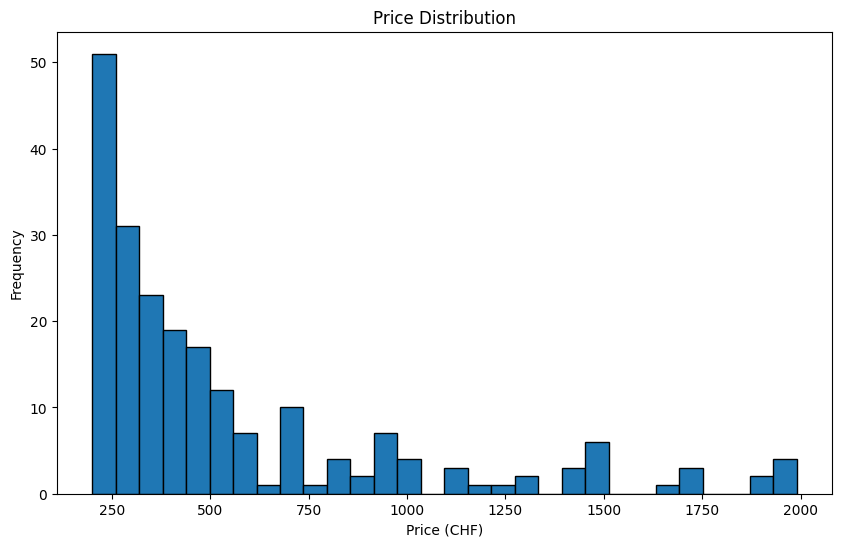

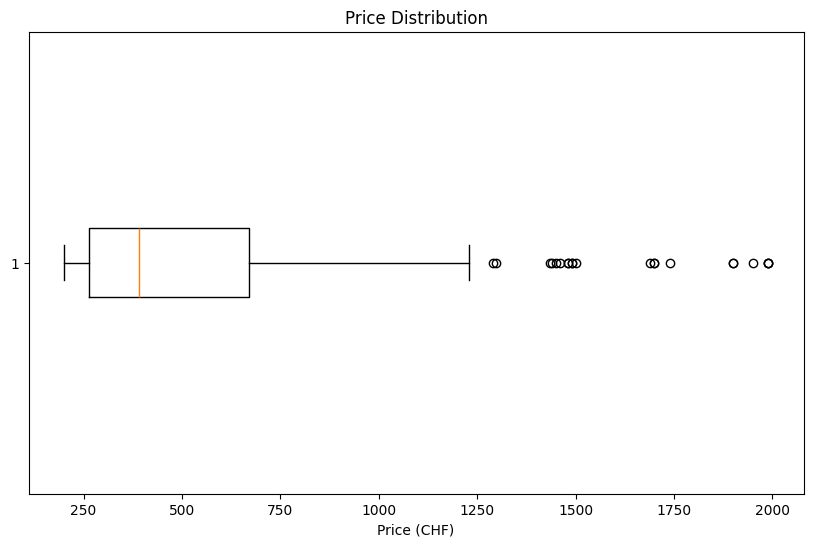

In [15]:
import matplotlib.pyplot as plt

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_sub_02['price'], bins=30, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price (CHF)')
plt.ylabel('Frequency')
plt.show()

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df_sub_02['price'], vert=False)
plt.title('Price Distribution')
plt.xlabel('Price (CHF)')
plt.show()

In [16]:
# Extract city / canton (note the split(',') which considering commas)
df_sub_02['location'] = df['address_raw'].str.split(',').str[0]

# Show result
df_sub_02[['address_raw', 'location']]

,address_raw,location
1,"Zürich, 8032, 26.02.2023",Zürich
3,"St. Gallen, 9607, 26.02.2023",St. Gallen
6,"Glarus, 8866, 26.02.2023",Glarus
15,"Schwyz, 8806, 25.02.2023",Schwyz
16,"Glarus, 8865, 25.02.2023",Glarus
...,...,...
577,"Aargau, 5600, Heute 07:29",Aargau
578,"Basel-Landschaft, 4410, Heute 07:24",Basel-Landschaft
585,"Luzern, 6122, Heute 06:05",Luzern
593,"Bern, 3084, Gestern 19:06",Bern


In [19]:
# Use set and dictionary comprehension to create a dictionary
bicycle_dict = {x: df_sub_02.loc[df_sub_02['location'] == x, 'price'].tolist() \
               for x in set(df_sub_02['location'])}

# Print the resulting dictionary keys and values
print('Dictionary with keys and values:')
print(bicycle_dict)

# Print the resulting dictionary keys
print('\nDictionary keys:')
print(bicycle_dict.keys())

# Print the resulting dictionary values
print('\nDictionary values')
print(bicycle_dict.values())

Dictionary with keys and values:
{'04.03.2023': [320], 'Freiburg': [432], 'Luzern': [495, 220, 320, 250, 460, 200, 480, 240, 220, 280, 280, 280, 439, 280], 'Aargau': [480, 580, 320, 210, 650, 300, 300, 600, 230, 320, 480, 200, 280, 390, 250, 250, 280, 700, 800, 230, 480, 699, 230, 250, 270, 280, 400, 1900, 1700, 250, 320, 500, 300, 499, 1100, 500, 250, 320, 320, 230, 280, 250, 260, 230, 250, 280, 230, 260, 230, 220, 950, 950, 280, 390, 230, 360, 320, 380, 599, 599, 320], 'Graubünden': [590, 250, 400], 'Zürich': [200, 220, 800, 350, 550, 690, 339, 250, 200, 251, 949, 599, 336, 949, 899, 1690, 990, 250, 430, 379, 1290, 990, 240, 550, 990, 230, 270, 200, 950, 790, 1700, 300, 949, 300, 455, 270, 280, 290, 250, 1230, 1030, 375, 450, 800, 240, 220], 'Solothurn': [350, 500, 799, 695, 1740, 1950, 690], 'Thurgau': [1900, 400, 400, 200, 450], 'Basel-Stadt': [1435, 600], 'Schwyz': [399, 250, 324], 'Glarus': [390, 355], 'Wallis': [200], 'St. Gallen': [320, 400, 200, 1460, 210, 1120, 1990, 1120, 14

In [20]:
# Define the key
mykey = 'Zürich'

# Check whether FERRARI is a key in car_dict
if mykey in bicycle_dict:
    print(f'The key {mykey} exists!')

# Get all values from the key
print(f'\nHere are the available prices of the key {mykey}:')
print(bicycle_dict.get(mykey))

The key Zürich exists!

Here are the available prices of the key Zürich:
[200, 220, 800, 350, 550, 690, 339, 250, 200, 251, 949, 599, 336, 949, 899, 1690, 990, 250, 430, 379, 1290, 990, 240, 550, 990, 230, 270, 200, 950, 790, 1700, 300, 949, 300, 455, 270, 280, 290, 250, 1230, 1030, 375, 450, 800, 240, 220]
